# Animating LADiM output

This notebook demonstrates how to animate LADiM output in a jupyter notebook.

The example is modified from a notebook from Pål N. Sævik

## Imports 

In [1]:
# Basic
import numpy as np
from netCDF4 import Dataset

# Plotting
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
%matplotlib inline

# Ladim
from postladim import ParticleFile

## Basic settings

In [2]:
# Files
ladim_file = 'line.nc'
grid_file    = '../data/ocean_avg_0014.nc'

# Subgrid for plotting
i0, i1 = 50, 150
j0, j1 = 60, 140

##  Plot initial particle distribution

This also prepares for the following animation.

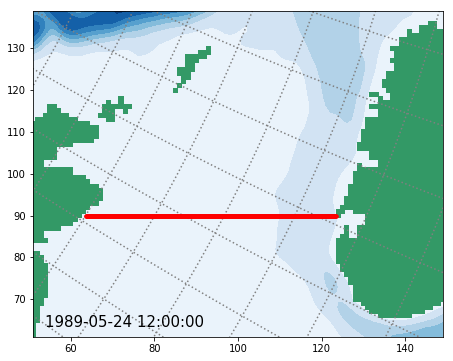

In [3]:
# Read data for background plot
with Dataset(grid_file) as ncid:
    H = ncid.variables['h'][j0:j1, i0:i1]
    M = ncid.variables['mask_rho'][j0:j1, i0:i1]
    lon = ncid.variables['lon_rho'][j0:j1, i0:i1]
    lat = ncid.variables['lat_rho'][j0:j1, i0:i1]
    
# Cell centers and boundaries
Xcell = np.arange(i0, i1)
Ycell = np.arange(j0, j1)
Xb = np.arange(i0-0.5, i1)
Yb = np.arange(j0-0.5, j1)

# Set up the plot area
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(xlim=(i0+1, i1-1), ylim=(j0+1, j1-1), aspect='equal')

# Background bathymetry
cmap = plt.get_cmap('Blues')
ax.contourf(Xcell, Ycell, H, cmap=cmap)

# Lon/lat lines
ax.contour(Xcell, Ycell, lat, levels=range(55, 63),
           colors='grey', linestyles=':')
ax.contour(Xcell, Ycell, lon, levels=range(-6, 10, 2),
           colors='grey', linestyles=':')

# A simple landmask from the ROMS grid
constmap = plt.matplotlib.colors.ListedColormap([0.2, 0.6, 0.4])
M = np.ma.masked_where(M > 0, M)
ax.pcolormesh(Xb, Yb, M, cmap=constmap)

# particle_file
pf = ParticleFile(ladim_file)

# Particle plot
X, Y = pf.position(0)
dots, = ax.plot(X, Y, '.', color='red')

# Time stamp, lower left corner
timestamp = ax.text(0.03, 0.03, pf.time(0), fontsize=15,
                    transform=ax.transAxes)

# Animation update function
def plot_dots(timestep):
    X, Y = pf.position(timestep)
    dots.set_data(X, Y)
    timestamp.set_text(pf.time(timestep))
    return dots

plot_dots(0);

## Animation 

In [4]:
anim = animation.FuncAnimation(fig, plot_dots,
    frames=pf.num_times, interval=50, repeat=False)

HTML(anim.to_html5_video())